![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Teste 2: funções inversas

Neste teste, iremos analisar a função $f(x) = x e^x$, para construir a função inversa $g(y) = x$.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1: Análise da função

## 1.1 Gráfico

Em geral, uma boa forma de analisar uma função é fazendo o gráfico dela.

Faça um gráfico de $f$ no intervalo $[-4,1]$. Também indique:
- um título; e
- dê nome aos eixos.

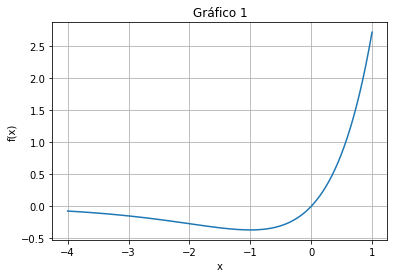

In [28]:
def f(x):
    return (np.e**x) * x
x = np.linspace(-4, 1, num=100)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gráfico 1")
plt.grid()
ax = plt.gca()
plt.show()

In [29]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

In [30]:
valores = ax.lines[0].get_ydata()
a, b = min(valores), max(valores)
assert np.isclose(a, -0.36787944117144, atol=1e-4)
assert np.isclose(b, 2.718281828459045, atol=1e-4)

In [31]:
ax = None

## 1.2: Mínimos e Máximos

Se uma função troca a direção de crescimento, isso muda a análise das raízes.
Portanto, é importante saber onde estão os máximos e mínimos locais de $f$.

Calcule (analiticamente) a derivada de $f$, e indique o(s) ponto(s) em que ela se anula.

São pontos de máximo ou de mínimo?

Vamos calcular a derivada de f a partir da regra do produto e em seguida vamos ver para que valores de x ela se anula:

$f(x) = xe^x$  <br />
$f^{'}(x) = e^x + xe^x$ <br />
$e^x (1 + x) = 0 \therefore x = -1$ <br />

Concluimos que a derivada se anula no ponto $x = -1$, podemos verificar se ele é um ponto de máximo ou mínimo substituindo $x$ por -2 e por 1 na derivada e verificando a troca de sinal.

$f^{'}(-2) = -2e^{-2} + e^{-2} = -e^{-2}$ <br />

$f^{'}(1) = 1e^1 + e^1 = 2e$  <br />

Assim, $f^{'}(-2)$ é negativo e $f^{'}(1)$ é positivo. Isso significa que -1 é um mínimo local, já que a função está decrescendo (derivada negativa) e passa a crescer (derivada positiva)

Agora, faça uma figura com dois gráficos:
- No primeiro, o gráfico da derivada de $f$ no mesmo intervalo $[-4, 1]$;
- Ao lado, um "zoom" em uma região que você considere importante.

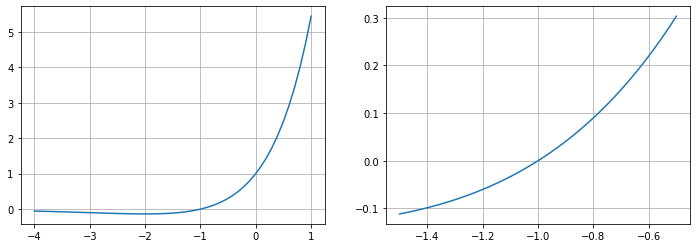

In [32]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(12,4))

def devf(x):
    return (np.e**x) + x * (np.e**x)
x = np.linspace(-4, 1)
ax1.plot(x, devf(x))
x = np.linspace(-1.5, -0.5)
ax2.plot(x, devf(x))

ax1.grid()
ax2.grid()

Como estes gráficos ajudam a confirmar os mínimos e máximos que você calculou?

Nesses gráficos é possível enxergar onde derivada se anula. Além disso, podemos enxergar onde a derivada é negativa e onde ela é positiva o que ajuda a classificar o ponto  como de máximo ou de mínimo.

## 1.3: Número de raízes

Usando a informação da derivada da função, seus maximo(s) e minimo(s), responda: 

Quantas raizes a equação $f(x) = y$ tem para cada valor de $y$?

Podemos separa esse problema em 4 situações:

1) y maior ou igual a zero: há uma única raiz
2) y entre $\frac{-1}{e}$ e 0: há duas raízes
3) y igual a $\frac{-1}{e}$: há uma única raiz 
4) y menor que $\frac{-1}{e}$: não há raízes

O primeiro item faz sentido porque, quando y é igual a zero a função apresenta uma raiz no x = 0 (como vimos no gráfico). Quando y é diferente de zero e positivo, se $x \to -\infty$ a função tende a -y e, portanto, não toca o eixo das abcissas nessa direção já que não ultrapassa esse valor. Entretanto, se $x \to \infty$ a função tende a $\infty$ e, portanto, haverá uma raiz positiva que foi apenas transladada.


O segundo item está relacionado com o fato de que a função ainda não foi transladada até seu ponto de mínimo e, com o y negativo, se  $x \to -\infty$ a função tende a y (positivo), ou seja, corta a abcissa. Por isso, a raiz passa a apresentar duas raízes.

O terceiro item se justifica porque, quando y é igual a $\frac{-1}{e}$ a função apresenta uma raiz justamente no ponto de mínimo -1. Como esse é o menor valor que a função atinge no eixo das ordenadas, abaixo desse valor de y a função não apresenta mais raízes; o que justifica o item 4.


# Questão 2: Construindo a função inversa

A maior dificuldade de usar a bisseção para construir a função inversa é que precisamos de um intervalo onde a raiz estará.

## 2.1: Gráficos para limitar a bisseção

Faça um gráfico das funções $x e^x$ e $e^x$ e veja que,
para $y$ suficientemente grande,
a raiz estará sempre abaixo de $\log y$.
Isso permite achar um limite superior para um intervalo de bisseção.

Escolha um intervalo razoável para o gráfico, que ajude a observar quão "grande" $y$ deve ser.

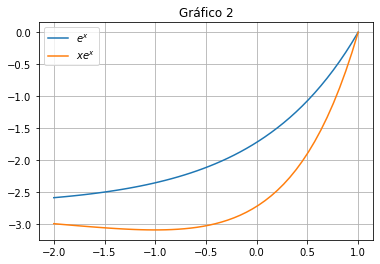

In [33]:
y = np.e
x = np.linspace(-2, np.log(y))
plt.title("Gráfico 2")
plt.plot(x, (np.e**x) - y, label = "$e^x$")
plt.plot(x, x * (np.e**x) - y, label = "$xe^x$")
plt.legend()
plt.grid()
ax = plt.gca()
plt.show()

In [34]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2
assert ax.title.get_text() != ""

Agora, falta estudar o que acontece quando $x \to -\infty$.

Faça o gráfico de $f$ e o de $1/x$ para $x \in [-4, -1]$.

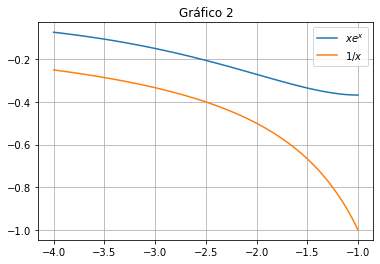

In [35]:
def q(x):
    return 1/x
x = np.linspace(0, np.log(y))
plt.title("Gráfico 2")
x = np.linspace(-4, -1)
plt.plot(x, f(x), label = "$x e^x$")
plt.plot(x, q(x), label = "$1/x$")
plt.legend()
plt.grid()

ax = plt.gca()
plt.show()

Explique porque (usando o gráfico e outras contas, se você julgar necessário),
quando $f(x) = y$ tem uma raiz "muito negativa",
esta raiz é menor (em valor absoluto) do que a raiz de $1/x = y$.

Pelo gráfico, percebemos que a função f está crescendo no sentido $-\infty$ mais rápido que a função 1/x. Assumindo que as funções do enunciado apresentarão uma raiz negativa para determinado valor de y, a f irá precisar de um valor de x menor (em valor absoluto) para alcançar esta raiz em relação a função 1/x. 



## 2.2: A função inversa propriamente dita

Agora, programe a função inversa de $f$ (chamada $g$),
que retorne **todas** as soluções de $f(x) = y$ em uma lista.

Se não houver raízes, retorne a lista vazia.

In [36]:
def bisseção(f, a, b, xtol=1e-10, ytol=1e-10):
    while True:
        media  = (a + b)/2
        prod = f(b) * f(media)
        #print(media)
        if abs(b-a) <= xtol:
            return media
        elif abs(f(media)) <= ytol:
            return media
        elif prod > 0:
            b = media
        elif prod < 0:
            a = media
        else:
            return b

In [37]:
def g(y, xtol=1e-8, ytol=1e-8):
    """
        Limiar da direita: 
        1) y é maior ou igual a e -> utilizar np.log(y) como limiar da direita
        2) a função tem uma raiz muito negativa -> utilizar 1/y como limiar da esquerda
    
    """ 
    f = lambda x: x * np.e**x - y
    raizes = []
    if y >= 0:
        # Há uma raiz positiva
        if y >= np.e:
            raizes.append(bisseção(f, 0, np.log(y), xtol, ytol))
        else:
            #print("entrei")
            raizes.append(bisseção(f, 0, np.e, xtol, ytol))
    elif y < 0 and y > -1/np.e:
        # Para a raiz mais negativa
        raizes.append(bisseção(f, 1/y, -1, xtol, ytol))
        # Para a raiz mais próxima de zero
        raizes.append(bisseção(f,-1, 0, xtol, ytol))
    elif y == -1/np.e:
        raizes.append(-1)

    return raizes


In [38]:
r1 = g(1)[0]
assert np.isclose(r1, 0.5671432904097838)
assert np.isclose(f(r1), 1)

In [39]:
assert g(-1) == []

In [40]:
r1, r2 = g(-0.1)
assert np.isclose(f(r1), -0.1)
assert np.isclose(f(r2), -0.1)
assert abs(r1 - r2) > 1

In [41]:
r1 = g(200)[0]
assert np.isclose(f(r1), 200)

# Questão 3:  Mudança de Variaveis

Vamos modificar um pouco nossa equação $x e^x = y$.

Para cada um dos casos, ache as raízes a partir de uma mudança de variáveis para transformar a equação em algo da forma

$$ u e^u = t. $$
**Escreva sempre qual foi a mudança de variaveis feita**, relacionando $t$ com $y$ e $u$ com $x$.

Dica: Ache uma mudança de variáveis "na mão" para as funções,
utilize o código da questão anterior para descobrir as raízes "transformadas" $u$,
e depois volte para as variáveis $x$

## 3.1: Expoentes diferentes

Resolva $x e^{2x} = 7$

Mudança de variável:

$u = 2x$ 

$\frac{u}{2} e^u = 7$

$u e^u = 14$

$t = 14$

In [42]:
u = g(14)[0]
x = u/2

In [43]:
assert np.isclose(x * np.exp(2*x), 7)

## 3.2: Parte linear diferente

Encontre as duas raízes de $(x  + 1) e^{x} = -\frac{1}{10}$.

Mudança de variável:

$u = x + 1$


$u e^{u - 1} = \frac{-1}{10}$


$u \frac{e^{u}}{e} = \frac{-1}{10}$

$u e^u = \frac{-e}{10}$

$t = \frac{-e}{10}$

In [44]:
u = g(-np.e/10)
x1 = u[0] - 1
x2 = u[1] - 1

In [45]:
assert np.isclose((x1+1)*np.exp(x1), -0.1)
assert np.isclose((x2+1)*np.exp(x2), -0.1)
assert abs(x1 - x2) > 1

## 3.3: Mudança genérica de variáveis

Para resolver a equação

$$(x + a)e^{bx} = c, \quad \text{com $b \neq 0$},$$

podemos fazer uma mudança de variáveis (em função de $a$ e $b$)
para transformar em uma equação $u e^u = t$.

Explique qual é a mudança a ser feita.

Mudança de variável:

$u = b (x + a)$

$\frac{u}{b} e^{u - ba} = c$

$u e^u = bce^{ba}$

$t = bce^{ba}$

Agora, faça um programa que recebe os parâmetros $a$, $b$ e $c$
e retorna uma lista com as soluções.

Dica: use uma _list comprehension_  para fazer a transformação inversa.

In [46]:
def solução_geral(a,b,c):
    """Soluções da equação (x+a)e^{bx} = c"""
    assert b != 0
    us = g(b*c*(np.e**(b*a)))
    return [ (sol/b) - a for sol in us]

Testes

In [47]:
def geral(x, a, b):
    return (x+a)*np.exp(b*x)

In [48]:
r1 = solução_geral(0, 1, 2)[0]
assert np.isclose(geral(r1, 0, 1), 2)

In [49]:
r1 = solução_geral(3, 2, 2)[0]
assert np.isclose(geral(r1, 3, 2), 2)

In [50]:
r1 = solução_geral(-1, -1, -1)[0]
assert np.isclose(r1, 0)

In [51]:
r1, r2 = solução_geral(-4, -1, 0.005)
assert np.isclose(geral(r1, -4, -1), 0.005)
assert np.isclose(geral(r2, -4, -1), 0.005)
assert np.abs(r1 - r2) > 1

# Questão 4: Uma outra função... (Bônus)

Vamos aplicar o mesmo raciocínio das questões anteriores para uma função um pouco diferente. 

Faça o gráfico da função $h(x) = x - \log(x)$.

C:\Users\maria\AppData\Local\Temp/ipykernel_820496/2153462320.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(x, x - np.log(x))


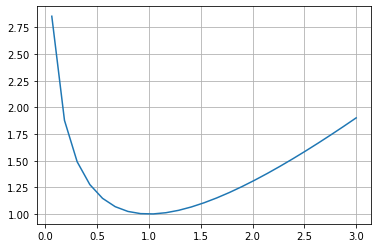

In [52]:
x = np.linspace(-3,3)
plt.plot(x, x - np.log(x))
plt.grid()

Ao variar o y, o que acontecerá com o número de raízes?
Essa função pode ter mais de 2 raizes?

O ponto mínimo da função ocorre em x = 1. Por isso, para valores de y menores que 1 a função não apresenta raiz. Percebemos isso no próprio gráfico em que y = 0. De fato, como a função está acima do eixo x, ela só passa a apresentar raízes depois que seu ponto de mínimo é transladado até o eixo das abcissas. Com y = 1, a função apresenta raiz no seu ponto mínimo. Com valores de y maiores a função apresenta duas raízes.

A função não pode apresentar mais de duas raízes. Isso porque ela só apresenta um ponto crítico (ponto de mínimo), ou seja, há apenas um momento em que a função troca o seu sentido de crescimento. 